



**Buisness Problem**

The market research team at a 'Fitness Equipment Company' wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

* Perform descriptive analytics to create a customer profile for each treadmill product by developing appropriate tables and charts.
* Construct two-way contingency tables for each treadmill product and compute all conditional and marginal probabilities and their insights/impact on the business.




## **What does ‘good’ look like?**


##**1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset**

* The data type of all columns in the “customers” table.

  Hint: We want you to display the data type of each column present in the
  dataset.
* You can find the number of rows and columns given in the dataset

  Hint: We want you to find the shape of the dataset.
* Check for the missing values and find the number of missing values in each
  column.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# To Ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Reading the CSV file
df = pd.read_csv('XXX_treadmill.txt')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


**Dataset Information:**

* Product: Product Purchased KP281, KP481, or KP781
* Age: In years
* Gender: Male/Female
* Education: in years
* MaritalStatus: single or partnered
* Usage: average number of times the customer plans to use the treadmill each week
* Income: annual income (in dollars)
* Fitness: self-rated fitness on a 1-to-5 scale, where 1 is poor shape and 5 is the excellent shape.
* Miles: average number of miles the customer expects to walk/run each week

**Product Portfolio:**

* The KP281 is an entry-level treadmill that sells for 1,500 dollars.
* The KP481 is for mid-level runners that sell for 1,750 dollars.
* The KP781 treadmill has advanced features that sell for 2,500 dollars.

In [4]:
#Checking the size of rows and columns
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 180
Number of columns: 9


In [5]:
#Data type of each column present in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
#Statistical Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [7]:
#Statistical Summary for Object DataType
df.describe(include = 'object').T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


###**Non Graphical Analysis: Unique Attributes and Value counts**

In [8]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

Company has Three threadmill models, namely KP281, KP481 and KP781

In [9]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [10]:
round(df['Product'].value_counts(normalize = True)*100)

KP281    44.0
KP481    33.0
KP781    22.0
Name: Product, dtype: float64

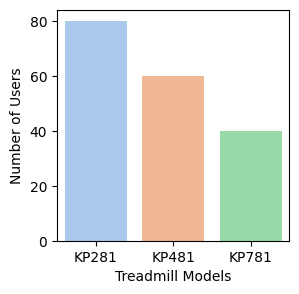

In [11]:
plt.figure(figsize = (3,3))
sns.countplot(data = df, x = df['Product'], palette = 'pastel' )
plt.xlabel('Treadmill Models')
plt.ylabel('Number of Users')
plt.show()

From the above percentages we can say 'KP281' is the most popular model among the customers

In [12]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [14]:
round(df['Gender'].value_counts(normalize = True)*100)

Male      58.0
Female    42.0
Name: Gender, dtype: float64

In the given dataset 58% of the population are Male and 42% population are Female

In [15]:
df['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

In [16]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [17]:
round(df['MaritalStatus'].value_counts(normalize = True)*100)

Partnered    59.0
Single       41.0
Name: MaritalStatus, dtype: float64

In [18]:
#Unique Values in each column
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [19]:
# NaN/Null Values in each column
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [20]:
#Checking for Duplicate Values
df.duplicated().value_counts()

False    180
dtype: int64

###Univariate Analysis

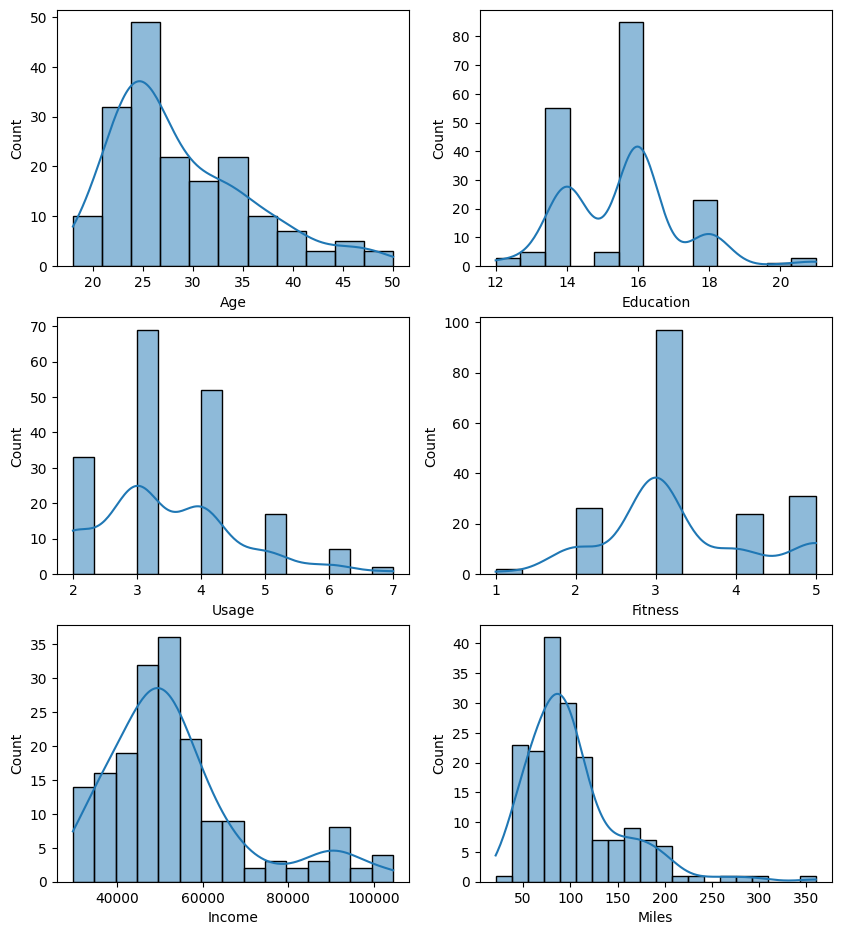

In [21]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,1])
plt.show()

Insights:
* There are no missing values in the data.
* There are 3 unique products in the dataset.
* KP281 is the most selling product in it's portfolio.
* Minimum & Maximum age of the person is 18 & 50, mean is 28.79 and 75% of persons have age less than or equal to 33.
* Most of the people are having 16 years of education i.e. 75% of persons are
 having education <= 16 years.
* Out of 180 data points, 104's gender is Male and rest are the female.
* Standard deviation for Income & Miles is very high. These variables might  have the outliers in it.

##**2. Detect Outliers**

* Find the outliers for every continuous variable in the dataset

  Hint: We want you to use boxplots to find the outliers in the given dataset
* Remove/clip the data between the 5 percentile and 95 percentile

  Hint: We want You to use np.clip() for clipping the data

###Bi-Variate Analysis

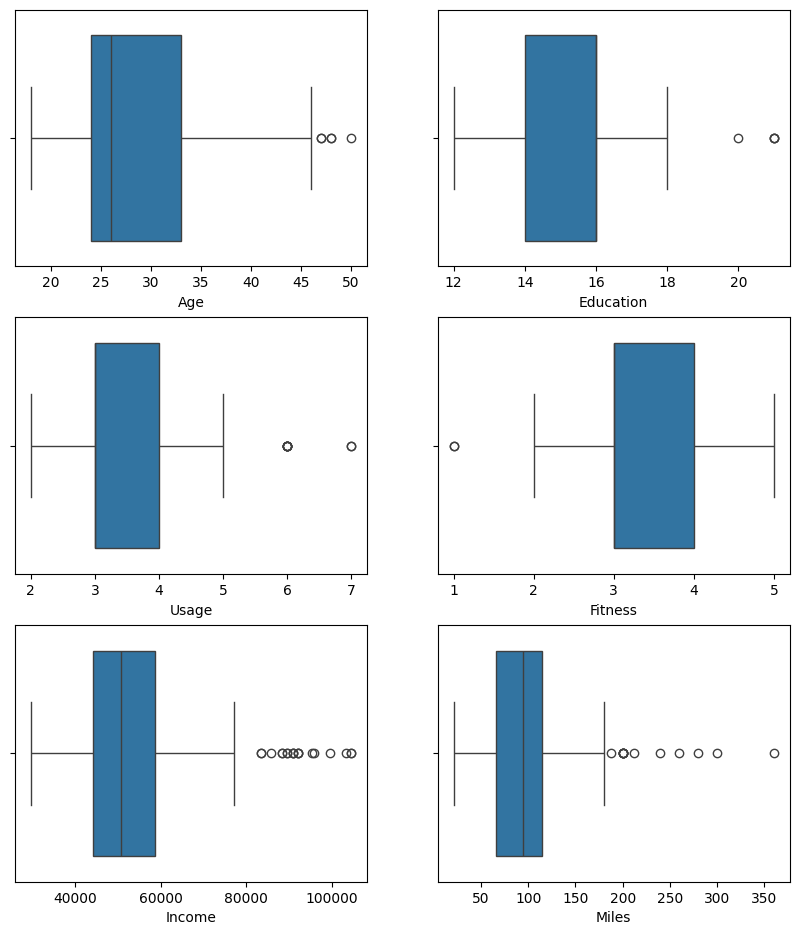

In [22]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

Insights:

From the boxplots it is quite clear that: Age, Education and Usage are having very few outliers. While Income and Miles are having more outliers.

In [23]:
df['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [24]:
df['Miles'].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

In [25]:
#Clipping Data between the 5 percentile and 95 percentile for Income column
i_05 = df['Income'].quantile(0.05) # 5th quantile
i_95 = df['Income'].quantile(0.95) # 95th quantile
df['Income'].clip(i_05, i_95, inplace=True)

#Clipping Data between the 5 percentile and 95 percentile for Miles column
m_05 = df['Miles'].quantile(0.05) # 5th quantile
m_95 = df['Miles'].quantile(0.95) # 95th quantile
df['Miles'].clip(m_05, m_95, inplace=True)

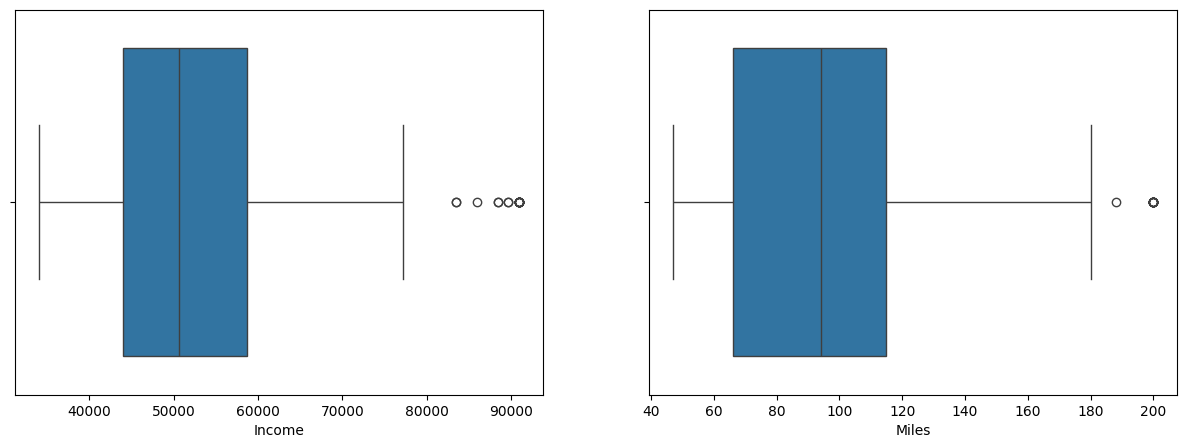

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, x='Income', orient='h')
plt.subplot(1,2,2)
sns.boxplot(data=df, x='Miles', orient='h')
plt.show()

Insights:

The boxplots indicate that the data is truncated between the 5th and 95th percentiles for the *Miles* and *Income* columns, resulting in a significant reduction in outliers. This truncation helps focus on the main distribution of the data, excluding extreme values that could skew the interpretation of the dataset

##**3. Check if features like marital status, Gender, and age have any effect on the product purchased**
* Find if there is any relationship between the categorical variables and the output variable in the data.
  
  Hint: We want you to use the count plot to find the relationship between
  categorical variables and output variables.
* Find if there is any relationship between the continuous variables and the output variable in the data.
  
  Hint: We want you to use a scatter plot to find the relationship between
  continuous variables and output variables.


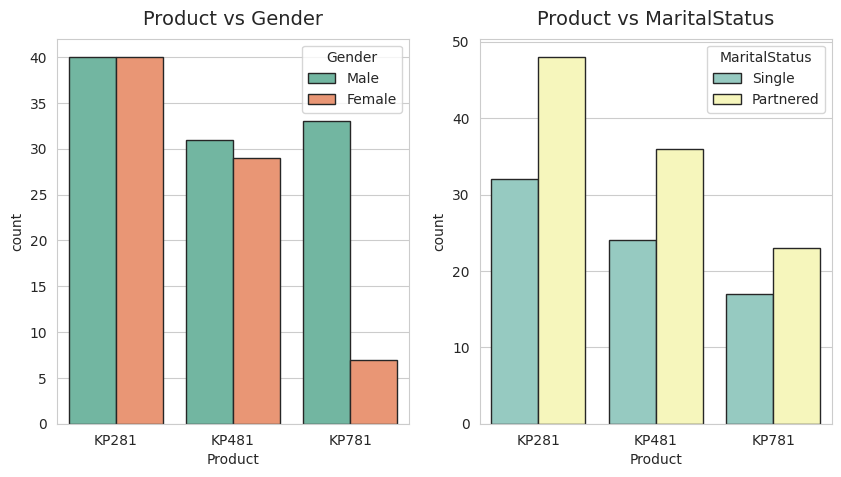

In [27]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15", palette='Set2', ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor="0.15", palette='Set3', ax=axs[1])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

Insights:

*Product vs Gender:*

* Equal number of males and females have purchased KP281 product and Almost same for the product KP481
* Most of the Male customers have purchased the KP781 product.

*Product vs MaritalStatus*

* Customer who is Partnered, is more likely to purchase the all the 3 products.

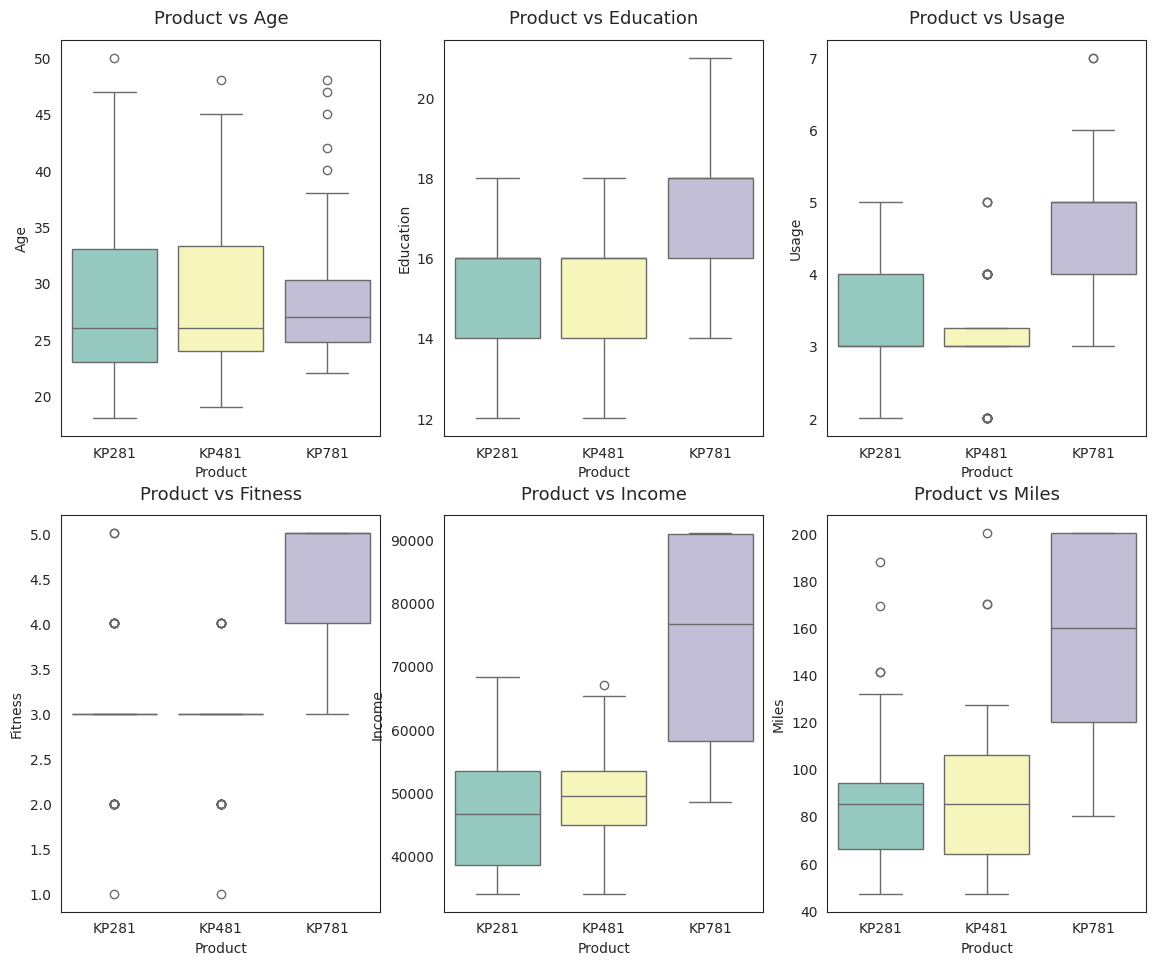

In [28]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attrs[count], ax=axs[i,j], palette='Set3')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

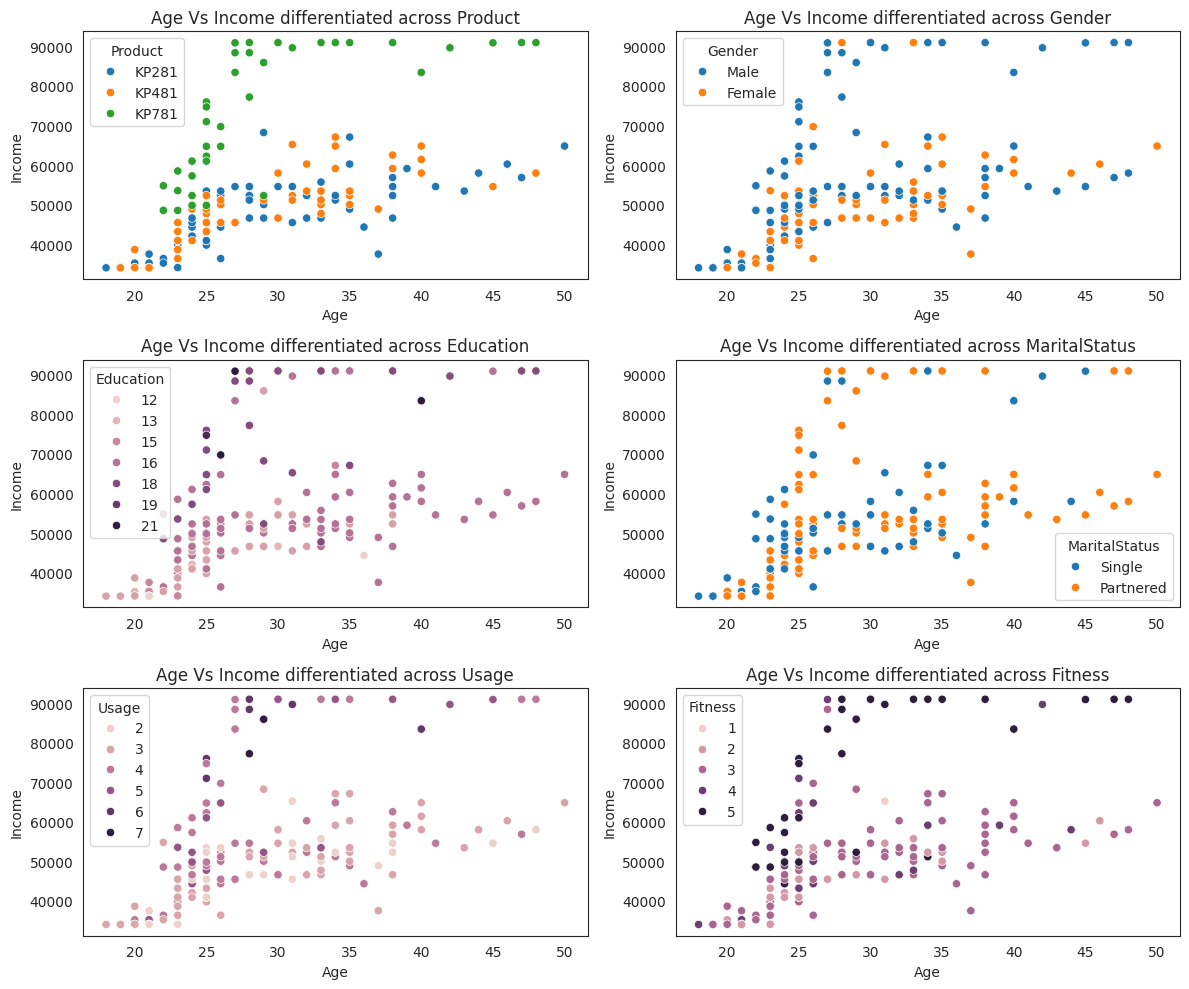

In [29]:
col_list = ['Product','Gender','Education','MaritalStatus','Usage','Fitness']
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=(12, 10))
axes = axes.flatten()
i = 0
for col in col_list:
    sns.scatterplot(data=df,x='Age',y='Income',hue=col,ax=axes[i])
    axes[i].set_title(f"Age Vs Income differentiated across {col}")
    i += 1
fig.tight_layout()
plt.show()

Insights:

*Product vs Age*
* Customers purchasing products KP281 & KP481 are having same Age median value.
* Customers whose age lies between 25-30, are more likely to buy KP781 product

*Product vs Education*

* Customers whose Education is greater than 16, have more chances to purchase the KP781 product.
* While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.

*Product vs Usage*
* Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.
* While the other customers are likely to purchasing KP281 or KP481.

*Product vs Fitness*
* The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.

*Product vs Income*
* Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product.

*Product vs Miles*
* If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product.

###Multivariate Analysis

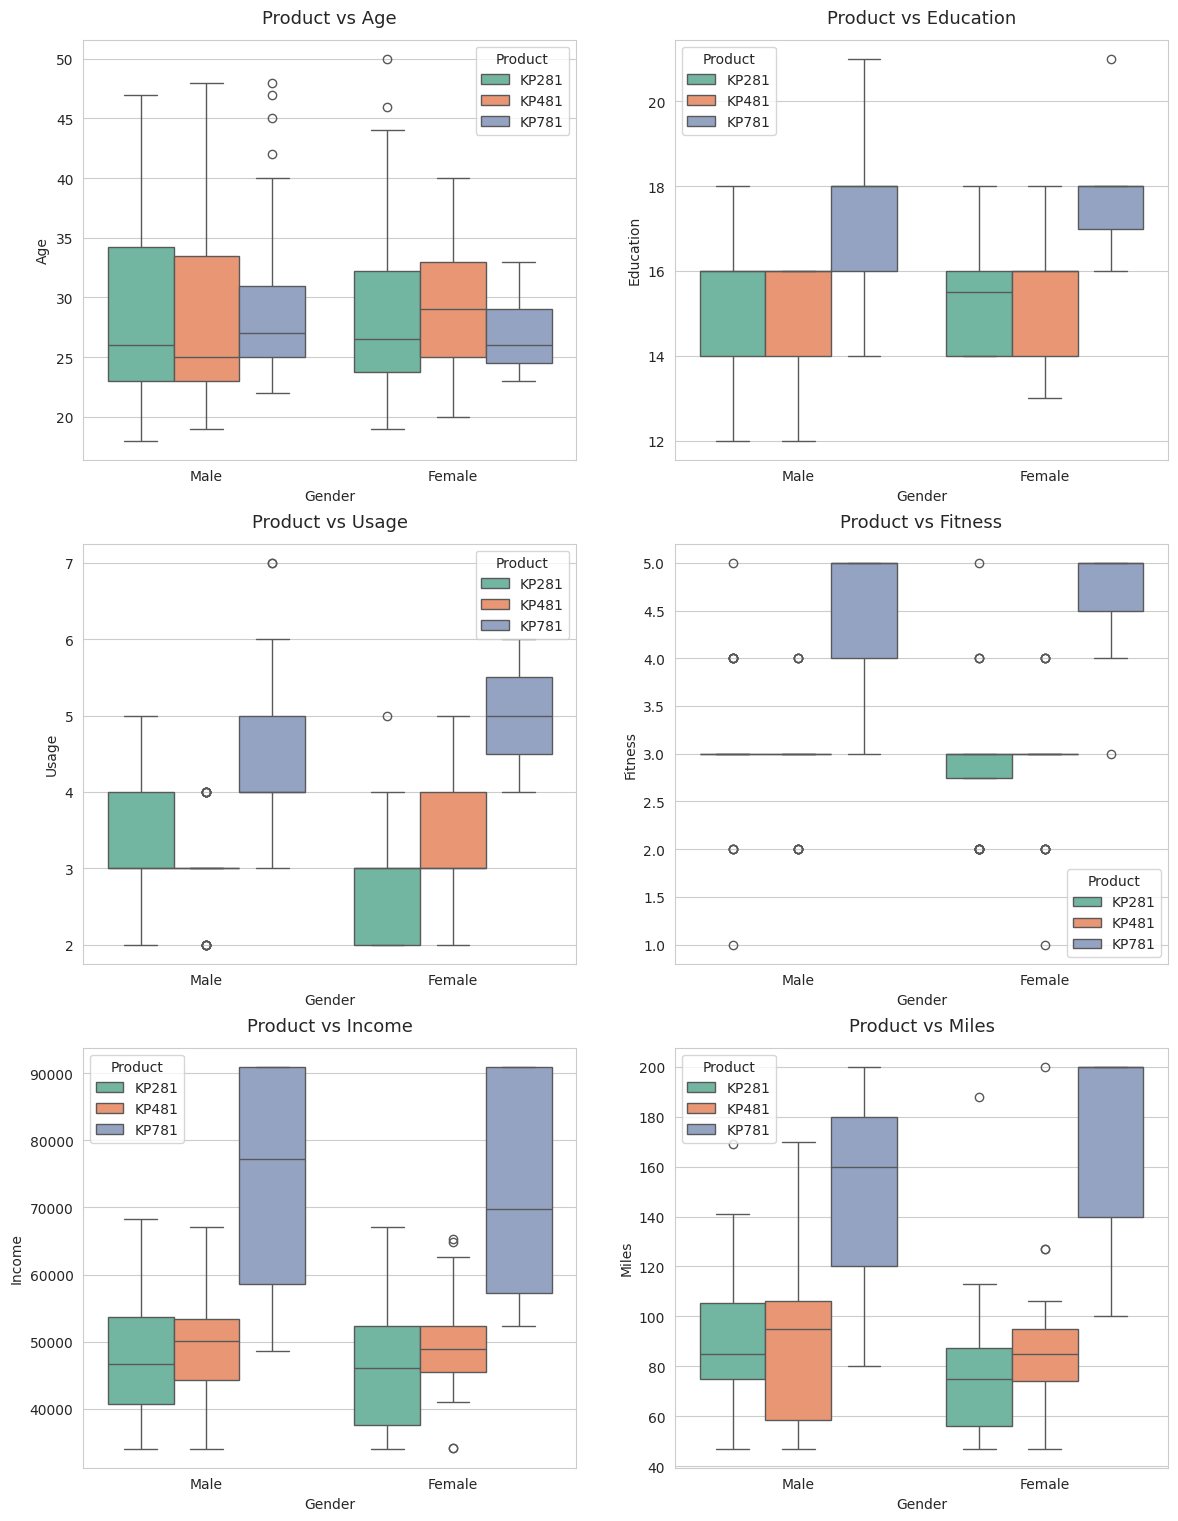

In [30]:
var= ['Age','Education','Usage','Fitness','Income','Miles']
sns.set_style("whitegrid")
fig,axs=plt.subplots(3,2,figsize=(14,12))
fig.subplots_adjust(top=1.3)
count=0
for i in range(3):
  for j in range(2):
    sns.boxplot(data=df,x='Gender',y=var[count],hue='Product',ax=axs[i,j],palette="Set2")
    axs[i,j].set_title(f"Product vs {var[count]}",pad=12,fontsize=13)
    count+=1

Insights:

* In both genders, whose education is greater than 16 years prefer to buy 'KP781' product.
* In both genders, Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.
* Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product.

##4. Representing the Probability

* Find the marginal probability (what percent of customers have purchased
KP281, KP481, or KP781)

  Hint: We want you to use the pandas crosstab to find the marginal probability
of each product.

* Find the probability that the customer buys a product based on each column.

  Hint: Based on previous crosstab values you find the probability.
* Find the conditional probability that an event occurs given that another event has occurred.

  (Example: given that a customer is female, what is the probability she’ll purchase a KP481)

  Hint: Based on previous crosstab values you find the probability.


In [31]:
pd.crosstab(index =df['Product'],columns = df['Gender'],margins = True,normalize = True ).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


Insights:
* 44.44% of the customers have purchased KP2821 product.
* 33.33% of the customers have purchased KP481 product.
* 22.22% of the customers have purchased KP781 product.

In [35]:
pd.crosstab(index =df['Product'],columns = df['Gender'],margins = True,normalize = True ).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


Insights:

The **Probability** of a treadmill being purchased by ***Male/Female*** is given below:
  * P(Male): 0.58
  * P(Female): 0.42



In [36]:
pd.crosstab(index =df['Product'],columns = df['Gender'],margins = True,normalize = True ).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


Insights:

The **Conditional probability** of purchasing  the treadmill model given that the customer is ***Male*** is:
  * P(KP781/Male): 0.32
  * P(KP481/Male): 0.30
  * P(KP281/Male): 0.38

The **Conditional probability** of purchasing  the treadmill model given that the customer is ***Female*** is:
  * P(KP781/Female): 0.09
  * P(KP481/Female): 0.38
  * P(KP281/Female): 0.53

From the above it is clear that :

* 58% of customers are male and 42% of the customers are female.
* Out of all males 32% bought KP781 , 30% bought KP481 , 38% bought KP281.
* Out of all females 9% bought KP781 , 38% bought KP481 , 53% bought KP281.

##5. Check the correlation among different factors
* Find the correlation between the given features in the table.

  Hint: We want you can use the heatmap and corr function to find the correlation between the variables.

In [39]:
# To find the co-relation between given featres in the DataSet.
corr_mat = df.corr()
corr_mat

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.512075,0.026168
Education,0.280496,1.000000,0.395155,0.410581,0.628908,0.367262
Usage,0.015064,0.395155,1.000000,0.668606,0.527707,0.786269
Fitness,0.061105,0.410581,0.668606,1.000000,0.535945,0.822393
Income,0.512075,0.628908,0.527707,0.535945,1.000000,0.537297
Miles,0.026168,0.367262,0.786269,0.822393,0.537297,1.000000


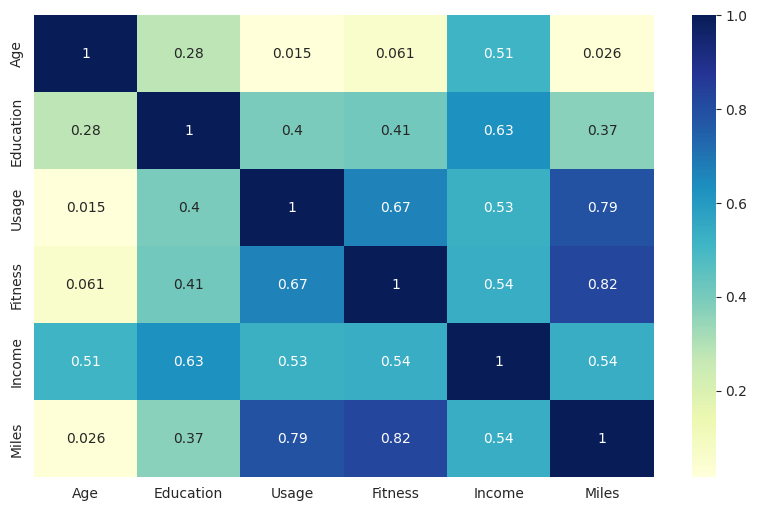

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_mat,annot = True, cmap="YlGnBu")
plt.show()

Insights:
* From the heatmap we can see a strong correlation between **Age** and **Income**.
* **Eductaion** and **Income** are highly correlated as its obvious.
* **Eductation** also has significant correlation between **Fitness** and **Usage** of the treadmill.
* **Usage** is highly correlated with **Fitness** and **Miles** as more the usage more the Fitness and Miles.

##6. Customer profiling and recommendation
* Make customer profilings for each and every product.
  
  Hint: We want you to find at What age, gender, and income group buy the product KP281
* Write a detailed recommendation from the analysis that you have done.

* *Creating New Column and Categorizing values in Age,Education,Income and Miles to different classes for better visualization*

In [49]:
 #binning the age values into categories
bin_range1 = [17,25,35,45,float('inf')]
bin_labels1 = ['Young Adults', 'Adults', 'Middle Aged Adults', 'Elder']
df['age_group'] = pd.cut(df['Age'],bins = bin_range1,labels = bin_labels1)

#binning the education values into categories
bin_range2 = [0,12,15,float('inf')]
bin_labels2 = ['Primary Education', 'Secondary Education', 'Higher Education']
df['edu_group'] = pd.cut(df['Education'],bins = bin_range2,labels = bin_labels2)

#binning the income values into categories
bin_range3 = [0,40000,60000,80000,float('inf')]
bin_labels3 = ['Low Income','Moderate Income','High Income','Very High Income']
df['income_group'] = pd.cut(df['Income'],bins = bin_range3,labels = bin_labels3)

#binning the miles values into categories
bin_range4 = [0,50,100,200,float('inf')]
bin_labels4 = ['Light Activity', 'Moderate Activity', 'Active Lifestyle', 'Fitness Enthusiast ']
df['miles_group'] = pd.cut(df['Miles'],bins = bin_range4,labels = bin_labels4)

In [50]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,edu_group,income_group,miles_group
0,KP281,18,Male,14,Single,3,4,34053.15,112,Young Adults,Secondary Education,Low Income,Active Lifestyle
1,KP281,19,Male,15,Single,2,3,34053.15,75,Young Adults,Secondary Education,Low Income,Moderate Activity
2,KP281,19,Female,14,Partnered,4,3,34053.15,66,Young Adults,Secondary Education,Low Income,Moderate Activity
3,KP281,19,Male,12,Single,3,3,34053.15,85,Young Adults,Primary Education,Low Income,Moderate Activity
4,KP281,20,Male,13,Partnered,4,2,35247.00,47,Young Adults,Secondary Education,Low Income,Light Activity


In [42]:
pd.crosstab(index =df['Product'],columns = df['Gender'],margins = True,normalize = True ).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


In [47]:
pd.crosstab(index =df['Product'],columns = df['MaritalStatus'],margins = True,normalize = True ).round(2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
All,0.59,0.41,1.00


In [48]:
pd.crosstab(index =df['Product'],columns = df['Usage'],margins = True,normalize = True ).round(2)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.11,0.21,0.12,0.01,0.00,0.00,0.44
KP481,0.08,0.17,0.07,0.02,0.00,0.00,0.33
KP781,0.00,0.01,0.10,0.07,0.04,0.01,0.22
All,0.18,0.38,0.29,0.09,0.04,0.01,1.00


In [54]:
pd.crosstab(index =df['Product'],columns = df['age_group'],margins = True,normalize = True ).round(2)

age_group,Young Adults,Adults,Middle Aged Adults,Elder,All
Product,,,,,
KP281,0.19,0.18,0.06,0.02,0.44
KP481,0.16,0.13,0.04,0.01,0.33
KP781,0.09,0.09,0.02,0.01,0.22
All,0.44,0.41,0.12,0.03,1.00


In [55]:
pd.crosstab(index =df['Product'],columns = df['edu_group'],margins = True,normalize = True ).round(2)

edu_group,Primary Education,Secondary Education,Higher Education,All
Product,,,,
KP281,0.01,0.21,0.23,0.44
KP481,0.01,0.14,0.18,0.33
KP781,0.00,0.01,0.21,0.22
All,0.02,0.36,0.62,1.00


In [56]:
pd.crosstab(index =df['Product'],columns = df['income_group'],margins = True,normalize = True ).round(2)

income_group,Low Income,Moderate Income,High Income,Very High Income,All
Product,,,,,
KP281,0.13,0.28,0.03,0.00,0.44
KP481,0.05,0.24,0.04,0.00,0.33
KP781,0.00,0.06,0.06,0.11,0.22
All,0.18,0.59,0.13,0.11,1.00


In [58]:
pd.crosstab(index =df['Product'],columns = df['miles_group'],margins = True,normalize = True ).round(2)

miles_group,Light Activity,Moderate Activity,Active Lifestyle,All
Product,,,,
KP281,0.07,0.28,0.10,0.44
KP481,0.03,0.22,0.09,0.33
KP781,0.00,0.04,0.18,0.22
All,0.09,0.54,0.37,1.00


Insights:

**Based on above analysis:**
  * Probability of purchase of KP281 = 44%
  * Probability of purchase of KP481 = 33%
  * Probability of purchase of KP781 = 22%

**Customer Profile for KP281 Treadmill:**
* Age Range: Primarily 18 to 35 years with some customers aged 35 to 50.
* Education: Completion of at least 13 years of education.
* Income: Below USD 60,000 annually.
* Usage: Typically 2 to 4 times per week.
* Fitness Level: Ranges from 2 to 4 on the scale.
* Running Mileage: Between 50 to 100 miles weekly.

**Customer Profile for KP481 Treadmill:**
* Age Range: Mainly 18 to 35 years with some customers aged 35 to 50.
* Education: Completion of at least 13 years of education.
* Income: Between USD 40,000 to USD 80,000 annually.
* Usage: Typically 2 to 4 times per week.
* Fitness Level: Ranges from 2 to 4 on the scale.
* Running Mileage: Between 50 to 200 miles weekly.

**Customer Profile for KP781 Treadmill:**
* Gender: Male
* Age Range: Between 18 to 35 years.
* Education: Completion of at least 15 years of education.
* Income: USD 80,000 and above annually.
* Usage: Typically 4 to 7 times per week.
* Fitness Level: Ranges from 3 to 5 on the scale.
* Running Mileage: Above 100 miles weekly.

These profiles outline the key characteristics of the target audience for each treadmill model, facilitating targeted marketing strategies and product recommendations.

##**Recommendations/ Actionable Insights**


**Marketing Strategies for KP781:**

To address the notable gender sales gap observed in the KP784 model, it is suggested to implement targeted initiatives tailored specifically for female customers. This may involve introducing special promotions and trial offers exclusively designed to appeal to this demographic.

**Ensuring Accessibility through Pricing and Payment Options:**

Considering the demographics of our target audience in terms of age, education, and income, it is vital to position the KP281 and KP481 Treadmill at an affordable price range. Additionally, offering flexible payment plans can make the treadmills more financially feasible for customers with diverse budgets, thereby enhancing accessibility.

**Seamless Integration with User-Friendly App:**

Developing a seamless app integration system is crucial to augment the treadmill user experience. The proposed app should synchronize effortlessly with the treadmill, enabling users to track their weekly running mileage, receive real-time progress feedback, and access personalized workout recommendations based on their fitness levels and objectives. This approach aims to enhance user engagement and satisfaction with the product.